# Analysis of UCB-Based Policy Selection

1. Compare the number of evaluations vs Spearman Rank Correlation to validation data
2. UCB evaluates each policy for 1-day and takes aggregate energy consumption as reward
3. Tested on the 15-zone test building

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget

## Valdiation Data

In [2]:
eval_data_loc = "../data/1month_eval.csv"
invalid_policies_loc = "../data/invalid_policy_list.json"

eval_df = pd.read_csv(eval_data_loc, header=None, names=["datetime", "policy", "zone", "energy"])
with open(invalid_policies_loc) as f:
    invalid_policies = json.load(f)["invalid_policies"]

## UCB Zone Data

In [5]:
core_top_loc = "../data/ucb_log_data/Perimeter_bot_ZN_1/3/ucb_log_data.csv"
core_top_df = pd.read_csv(core_top_loc)
core_top_df

FileNotFoundError: [Errno 2] No such file or directory: '../data/ucb_log_data/Perimeter_bot_ZN_1/3/ucb_log_data.csv'

In [4]:
core_top_cols = core_top_df.columns
policy_names = [col[15:-10] for col in core_top_cols if "score" in col]
num_policies = len(policy_names)

## UCB Q-Value Plot

In [5]:
core_top_q_vals_df = pd.DataFrame()
policies_for_plot = policy_names
core_top_q_vals_df["timestep"] = core_top_df[len(policies_for_plot):].index

for policy in policies_for_plot:
    score_col_name = f"policy_library/{policy}.pth_score"
    count_col_name = f"policy_library/{policy}.pth_count"
    core_top_q_vals_df[f"{policy}_value"] = core_top_df[len(policies_for_plot):][score_col_name].copy()
    core_top_q_vals_df[f"{policy}_count"] = core_top_df[len(policies_for_plot):][count_col_name].copy()

/var/folders/fj/cz0dpfh167bcqcd35cghfgk00000gn/T/ipykernel_68125/2632176178.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  core_top_q_vals_df[f"{policy}_count"] = core_top_df[len(policies_for_plot):][count_col_name].copy()
/var/folders/fj/cz0dpfh167bcqcd35cghfgk00000gn/T/ipykernel_68125/2632176178.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  core_top_q_vals_df[f"{policy}_value"] = core_top_df[len(policies_for_plot):][score_col_name].copy()
/var/folders/fj/cz0dpfh167bcqcd35cghfgk00000gn/T/ipykernel_68125/2632176178.py

In [6]:
core_top_q_vals_df

,timestep,100_0_value,100_0_count,100_1_value,100_1_count,100_1_1e-1_value,100_1_1e-1_count,100_1_1e0_value,100_1_1e0_count,100_1_1e1_value,...,119_2_1e1_value,119_2_1e1_count,119_3_value,119_3_count,119_3_1e0_value,119_3_1e0_count,119_4_value,119_4_count,119_4_1e0_value,119_4_1e0_count
0,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,11829,-16.633354,1.0,-10.957091,66.0,-27.893997,1.0,-12.994786,3.0,-22.354908,...,-24.410157,1.0,-17.945355,1.0,-16.374456,1.0,-14.074441,3.0,-12.545914,4.0
11573,11830,-16.633354,1.0,-10.957091,66.0,-27.893997,1.0,-12.994786,3.0,-22.354908,...,-24.410157,1.0,-17.945355,1.0,-16.374456,1.0,-14.074441,3.0,-12.545914,4.0
11574,11831,-16.633354,1.0,-10.957091,66.0,-27.893997,1.0,-12.994786,3.0,-22.354908,...,-24.410157,1.0,-17.945355,1.0,-16.374456,1.0,-14.074441,3.0,-12.545914,4.0
11575,11832,-16.633354,1.0,-10.957091,66.0,-27.893997,1.0,-12.994786,3.0,-22.354908,...,-24.410157,1.0,-17.945355,1.0,-16.374456,1.0,-14.074441,3.0,-12.545914,4.0


Text(0.5, 0, 'Timestep (days)')

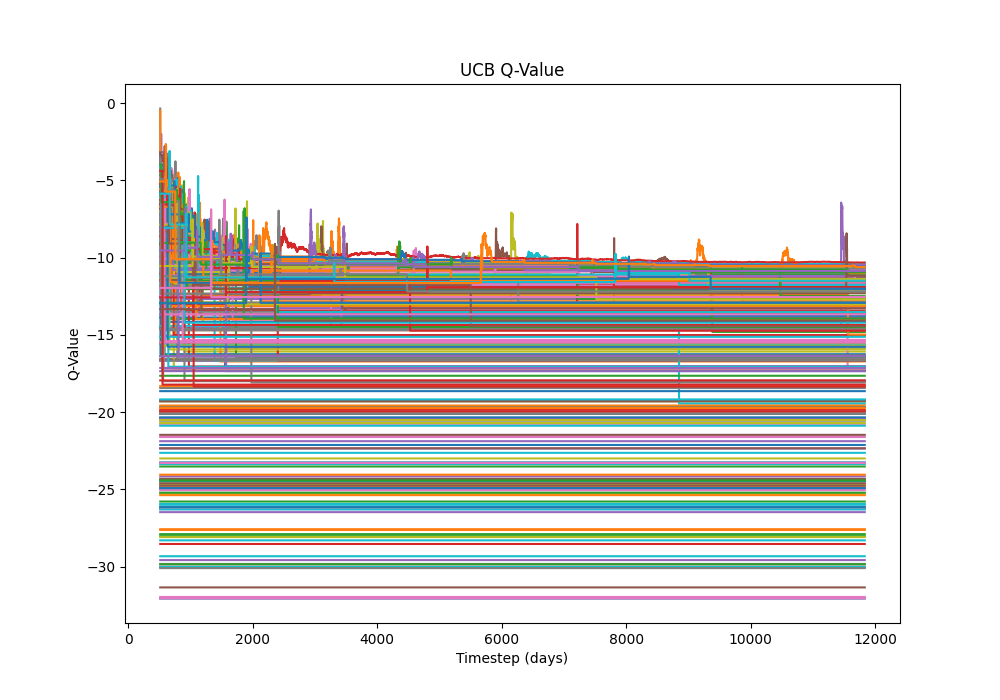

In [7]:
plt.figure(figsize=(10, 7))
plt.title("UCB Q-Value")
for policy in policies_for_plot:
    sns.lineplot(x="timestep", y=f"{policy}_value", data=core_top_q_vals_df)
plt.ylabel("Q-Value")
plt.xlabel("Timestep (days)")

Text(0.5, 0, 'Timestep (days)')

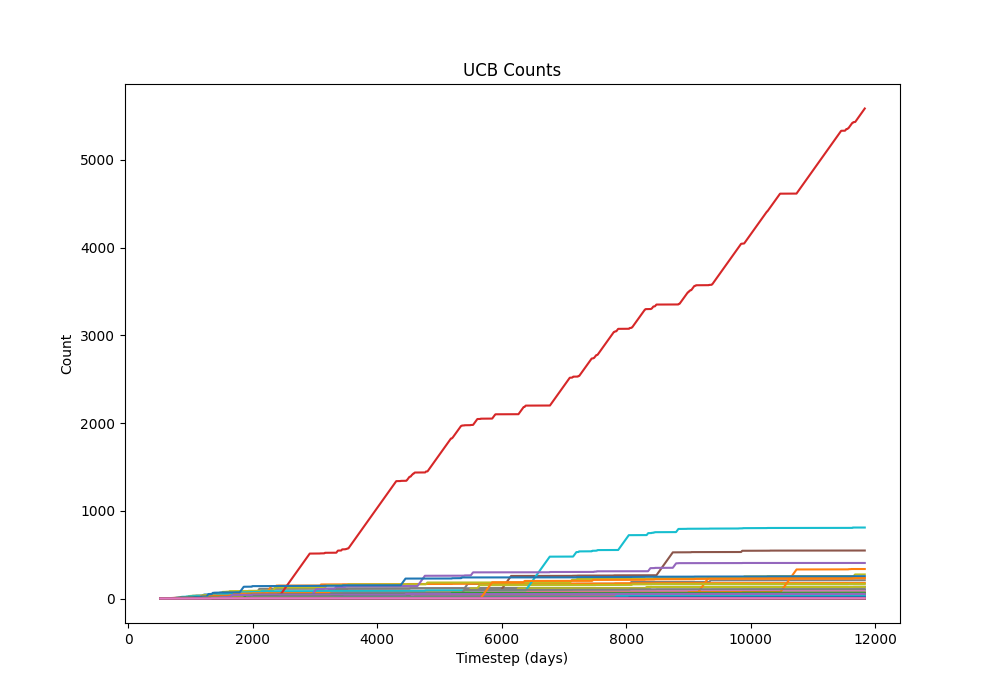

In [8]:
plt.figure(figsize=(10, 7))
plt.title("UCB Counts")
for policy in policies_for_plot:
    sns.lineplot(x="timestep", y=f"{policy}_count", data=core_top_q_vals_df)
plt.ylabel("Count")
plt.xlabel("Timestep (days)")

In [9]:
timestep = core_top_q_vals_df["timestep"].values[-1]
zone = "Core_top"
# zone_eval_df = eval_df[eval_df["zone"] == zone]
zone_eval_df = pd.DataFrame(columns=["datetime", "policy", "zone", "energy"])
for name in policy_names:
    name = f"policy_library/{name}.pth"
    zone_eval_df = pd.concat([zone_eval_df, eval_df[eval_df["policy"] == name]])
    # print(zone_eval_df)
zone_eval_df = zone_eval_df[zone_eval_df["zone"] == zone]
zone_eval_df = zone_eval_df.sort_values(by=["energy"])
zone_eval_df

,datetime,policy,zone,energy
213,2022-03-21 04:27:31.403300,policy_library/105_1_1e1.pth,Core_top,26104175.899444
195,2022-03-21 05:24:38.912090,policy_library/104_4_1e0.pth,Core_top,26126636.719438
101,2022-03-21 04:18:37.495103,policy_library/102_2_1e1.pth,Core_top,26127359.19524
69,2022-03-21 05:01:55.679941,policy_library/101_3_1e1.pth,Core_top,26154165.567784
485,2022-03-21 05:13:34.396212,policy_library/112_0_1e1.pth,Core_top,26157655.417112
...,...,...,...,...
109,2022-03-21 04:24:23.174032,policy_library/102_3_1e1.pth,Core_top,44518159.94998
443,2022-03-21 04:46:31.662172,policy_library/111_0_1e0.pth,Core_top,44526973.228734
107,2022-03-21 04:23:01.281444,policy_library/102_3_1e0.pth,Core_top,44535953.984806
85,2022-03-21 05:12:06.260802,policy_library/102_0_1e1.pth,Core_top,44547560.670703


In [10]:
ucb_row_idx = core_top_q_vals_df["timestep"].values[-1]
row = core_top_q_vals_df[core_top_q_vals_df["timestep"] == ucb_row_idx]
ucb_scores =[]
for policy_name in zone_eval_df["policy"].values:
    col_name = policy_name[15:-4] + "_value"
    value = row[col_name].values[0]
    ucb_scores.append(value)
print(ucb_scores)

[-16.374170297967165, -26.46983199365441, -20.75133259761729, -14.174299939602864, -24.60337304313096, -16.247453029670023, -27.8939968504506, -12.994786464999027, -16.518606397682138, -22.35490835069732, -28.026636049195705, -24.422493210648483, -24.64284386859155, -10.316291498146729, -17.13605886580756, -18.34032568993371, -14.51031861590009, -13.278824960845885, -20.465312716839115, -10.907171057410546, -20.87732417453272, -12.820551905127733, -24.410157425835934, -11.09238030309571, -11.35091374184629, -14.590976559481067, -13.26284855459338, -24.04448287461793, -10.949913419216273, -15.39989343517268, -12.167757051243573, -10.422962553903515, -14.604401750669032, -15.009834488018992, -11.622664415105277, -14.695874272480603, -31.959864049448733, -16.569613917547958, -24.355767632302445, -10.51160426008201, -11.494033222621658, -10.584128883911994, -25.212635217449314, -20.334260783046627, -29.324203624802333, -19.733795626009005, -17.343709889741238, -12.19447344861597, -10.55209

In [11]:
zone_eval_df["ucb_scores"] = ucb_scores
zone_eval_df

,datetime,policy,zone,energy,ucb_scores
213,2022-03-21 04:27:31.403300,policy_library/105_1_1e1.pth,Core_top,26104175.899444,-16.374170
195,2022-03-21 05:24:38.912090,policy_library/104_4_1e0.pth,Core_top,26126636.719438,-26.469832
101,2022-03-21 04:18:37.495103,policy_library/102_2_1e1.pth,Core_top,26127359.19524,-20.751333
69,2022-03-21 05:01:55.679941,policy_library/101_3_1e1.pth,Core_top,26154165.567784,-14.174300
485,2022-03-21 05:13:34.396212,policy_library/112_0_1e1.pth,Core_top,26157655.417112,-24.603373
...,...,...,...,...,...
109,2022-03-21 04:24:23.174032,policy_library/102_3_1e1.pth,Core_top,44518159.94998,-23.252657
443,2022-03-21 04:46:31.662172,policy_library/111_0_1e0.pth,Core_top,44526973.228734,-12.256189
107,2022-03-21 04:23:01.281444,policy_library/102_3_1e0.pth,Core_top,44535953.984806,-28.295892
85,2022-03-21 05:12:06.260802,policy_library/102_0_1e1.pth,Core_top,44547560.670703,-15.566692


In [12]:
correlation = spearmanr(zone_eval_df["energy"].values, zone_eval_df["ucb_scores"].values)
correlation

SpearmanrResult(correlation=0.022171353271197174, pvalue=0.7235302368592188)

In [38]:
policy_names

['100_0',
 '100_1',
 '100_1_1e-1',
 '100_1_1e0',
 '100_1_1e1',
 '100_2',
 '100_3',
 '100_4',
 '100_4_1e0',
 '100_4_1e1',
 '101_0',
 '101_1',
 '101_1_1e-1',
 '101_2',
 '101_2_1e-1',
 '101_3',
 '101_3_1e1',
 '101_4',
 '102_0',
 '102_0_1e-1',
 '102_0_1e0',
 '102_0_1e1',
 '102_1',
 '102_1_1e-1',
 '102_2',
 '102_2_1e-1',
 '102_2_1e1',
 '102_3',
 '102_3_1e-1',
 '102_3_1e0',
 '102_3_1e1',
 '102_4',
 '102_4_1e-1',
 '102_4_1e1',
 '103_0',
 '103_0_1e-1',
 '103_0_1e0',
 '103_0_1e1',
 '103_1',
 '103_1_1e-1',
 '103_1_1e0',
 '103_1_1e1',
 '103_2',
 '103_2_1e-1',
 '103_2_1e0',
 '103_2_1e1',
 '103_3',
 '103_3_1e-1',
 '103_3_1e0',
 '103_3_1e1',
 '103_4',
 '103_4_1e-1',
 '103_4_1e0',
 '103_4_1e1',
 '104_0',
 '104_0_1e-1',
 '104_1',
 '104_1_1e-1',
 '104_1_1e0',
 '104_2',
 '104_3',
 '104_3_1e-1',
 '104_4',
 '104_4_1e-1',
 '104_4_1e0',
 '105_0',
 '105_0_1e-1',
 '105_1',
 '105_1_1e-1',
 '105_1_1e1',
 '105_2',
 '105_2_1e-1',
 '105_2_1e0',
 '105_3',
 '105_3_1e-1',
 '105_3_1e0',
 '105_3_1e1',
 '105_4',
 '105_4